Archivo dedicado a la limpieza de datos. En este archivo se realizará desde la llegada del archivo sucio hasta la exportación de los datos limpios

Importación de librerías

In [1]:
import pandas as pd
import numpy as np 
import plotly as pl 
import seaborn as sns
import missingno as msno 
import matplotlib.pyplot as plt 

Carga del dataset

Se añaden las columnas al df siguiendo la documentacion de https://archive.ics.uci.edu/dataset/73/mushroom

In [2]:
colums = ['poisonus','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment',
           'gill-spacing','gill-size','gill-color','stalk-shape','stalk-root',
           'stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring',
           'stalk-color-below-ring','veil-type','veil-color','ring-number',
           'ring-type','spore-print-color','population','habitat']

data = pd.read_csv('../data/raw/agaricus-lepiota.data',names=colums)
data.head()

,poisonus,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Para entender mejor el dataset se mapearan las filas al valor real siguiendo la documentación

In [3]:
map_poisonus = {'p':'poisonous','e':'edible'}
map_cap_shape = {'b':'bell','c':'conical','x':'convex','f':'flat','k':'knobbed','s':'sunken'}
map_cap_surface = {'f':'fibrous','g':'grooves','y':'scaly','s':'smooth'}
map_cap_color = {'n':'brown','b':'buff','c':'cinnamon','g':'gray','r':'green','p':'pink'
                 ,'u':'purple','e':'red','w':'white','y':'yellow'}
map_bruises = {'t':'bruises','f':'no'}
map_odor = {'a':'almond','l':'anise','c':'creasote','y':'fishy','f':'foul','m':'musty'
                ,'n':'none','p':'pungent','s':'spicy'}
map_gill_attachment = {'a':'attached','d':'descending','f':'free','n':'notched'}
map_gill_spacing = {'c':'close','w':'crowded','d':'distant'}
map_gill_size = {'b':'broad','n':'narrow'}
map_gill_color = {'k':'black','n':'brown','b':'buff','h':'chocolate','g':'gray','r':'green',
                  'o':'orange','p':'pink','u':'purple','e':'red','w':'white','y':'yellow'}
map_stalk_shape = {'e':'enlarging','t':'tapering'}
map_stalk_root = {'b':'bulbous','c':'club','u':'cup','e':'equal','z':'rhizomorphs','r':'rooted'}
map_stalk_surface_above_ring = {'f':'fibrous','y':'scaly','k':'silky','s':'smooth'}
map_stalk_surface_below_ring = {'f':'fibrous','y':'scaly','k':'silky','s':'smooth'}
map_stalk_color_above_ring = {'n':'brown','b':'buff','c':'cinnamon','g':'gray','o':'orange',
                              'p':'pink','e':'red','w':'white','y':'yellow'}
map_stalk_color_below_ring = {'n':'brown','b':'buff','c':'cinnamon','g':'gray','o':'orange',
                              'p':'pink','e':'red','w':'white','y':'yellow'}
map_veil_type = {'p':'partial','u':'universal'}
map_veil_color = {'n':'brown','o':'orange','w':'white','y':'yellow'}
map_ring_number = {'n':'none','o':'one','t':'two'}
map_ring_type  = {'c':'cobwebby','e':'evanescent','f':'flaring','l':'large'
                   ,'n':'none','p':'pendant','s':'sheathing','z':'zone'}
map_spore_print_color ={'k':'black','n':'brown','b':'buff','h':'chocolate','r':'green',
                        'o':'orange','u':'purple','w':'white','y':'yellow'}
map_population = {'a':'abundant','c':'clustered','n':'numerous','s':'scattered',
                  'v':'several','y':'solitary'}
map_habitat = {'g':'grasses','l':'leaves','m':'meadows','p':'paths','u':'urban',
               'w':'waste','d':'woods'}


In [4]:
df = data.copy()

df['poisonus'] = df['poisonus'].map(map_poisonus)
df['cap-shape'] = df['cap-shape'].map(map_cap_shape)
df['cap-surface'] = df['cap-surface'].map(map_cap_surface)
df['cap-color'] = df['cap-color'].map(map_cap_color)
df['bruises'] = df['bruises'].map(map_bruises)
df['odor'] = df['odor'].map(map_odor)
df['gill-attachment'] = df['gill-attachment'].map(map_gill_attachment)
df['gill-spacing'] = df['gill-spacing'].map(map_gill_spacing)
df['gill-size'] = df['gill-size'].map(map_gill_size)
df['gill-color'] = df['gill-color'].map(map_gill_color)
df['stalk-shape'] = df['stalk-shape'].map(map_stalk_shape)
df['stalk-root'] = df['stalk-root'].map(map_stalk_root)
df['stalk-surface-above-ring'] = df['stalk-surface-above-ring'].map(map_stalk_surface_above_ring)
df['stalk-surface-below-ring'] = df['stalk-surface-below-ring'].map(map_stalk_surface_below_ring)
df['stalk-color-above-ring'] = df['stalk-color-above-ring'].map(map_stalk_color_above_ring)
df['stalk-color-below-ring'] = df['stalk-color-below-ring'].map(map_stalk_color_below_ring)
df['veil-type'] = df['veil-type'].map(map_veil_type)
df['veil-color'] = df['veil-color'].map(map_veil_color)
df['ring-number'] = df['ring-number'].map(map_ring_number)
df['ring-type'] = df['ring-type'].map(map_ring_type)
df['spore-print-color'] = df['spore-print-color'].map(map_spore_print_color)
df['population'] = df['population'].map(map_population)
df['habitat'] = df['habitat'].map(map_habitat)

df.head()

,poisonus,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


Mostrar tipo de datos de las columnas

In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   poisonus                  8124 non-null   str  
 1   cap-shape                 8124 non-null   str  
 2   cap-surface               8124 non-null   str  
 3   cap-color                 8124 non-null   str  
 4   bruises                   8124 non-null   str  
 5   odor                      8124 non-null   str  
 6   gill-attachment           8124 non-null   str  
 7   gill-spacing              8124 non-null   str  
 8   gill-size                 8124 non-null   str  
 9   gill-color                8124 non-null   str  
 10  stalk-shape               8124 non-null   str  
 11  stalk-root                5644 non-null   str  
 12  stalk-surface-above-ring  8124 non-null   str  
 13  stalk-surface-below-ring  8124 non-null   str  
 14  stalk-color-above-ring    8124 non-null   str  
 15

Modificar las columnas de string a category

In [6]:
df = df.astype({col:'category' for col in df.columns})
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   poisonus                  8124 non-null   category
 1   cap-shape                 8124 non-null   category
 2   cap-surface               8124 non-null   category
 3   cap-color                 8124 non-null   category
 4   bruises                   8124 non-null   category
 5   odor                      8124 non-null   category
 6   gill-attachment           8124 non-null   category
 7   gill-spacing              8124 non-null   category
 8   gill-size                 8124 non-null   category
 9   gill-color                8124 non-null   category
 10  stalk-shape               8124 non-null   category
 11  stalk-root                5644 non-null   category
 12  stalk-surface-above-ring  8124 non-null   category
 13  stalk-surface-below-ring  8124 non-null   category
 14  sta

Conteo de valores únicos

In [7]:
df.nunique()

poisonus                     2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   4
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

Vemos que como hay un único valor en veil-type, esta columan no seria relevante para el posterior estudio. Por lo tanto se elimina

In [8]:
df = df.drop(columns=['veil-type'])


Mostrar valores nulos

<Axes: >

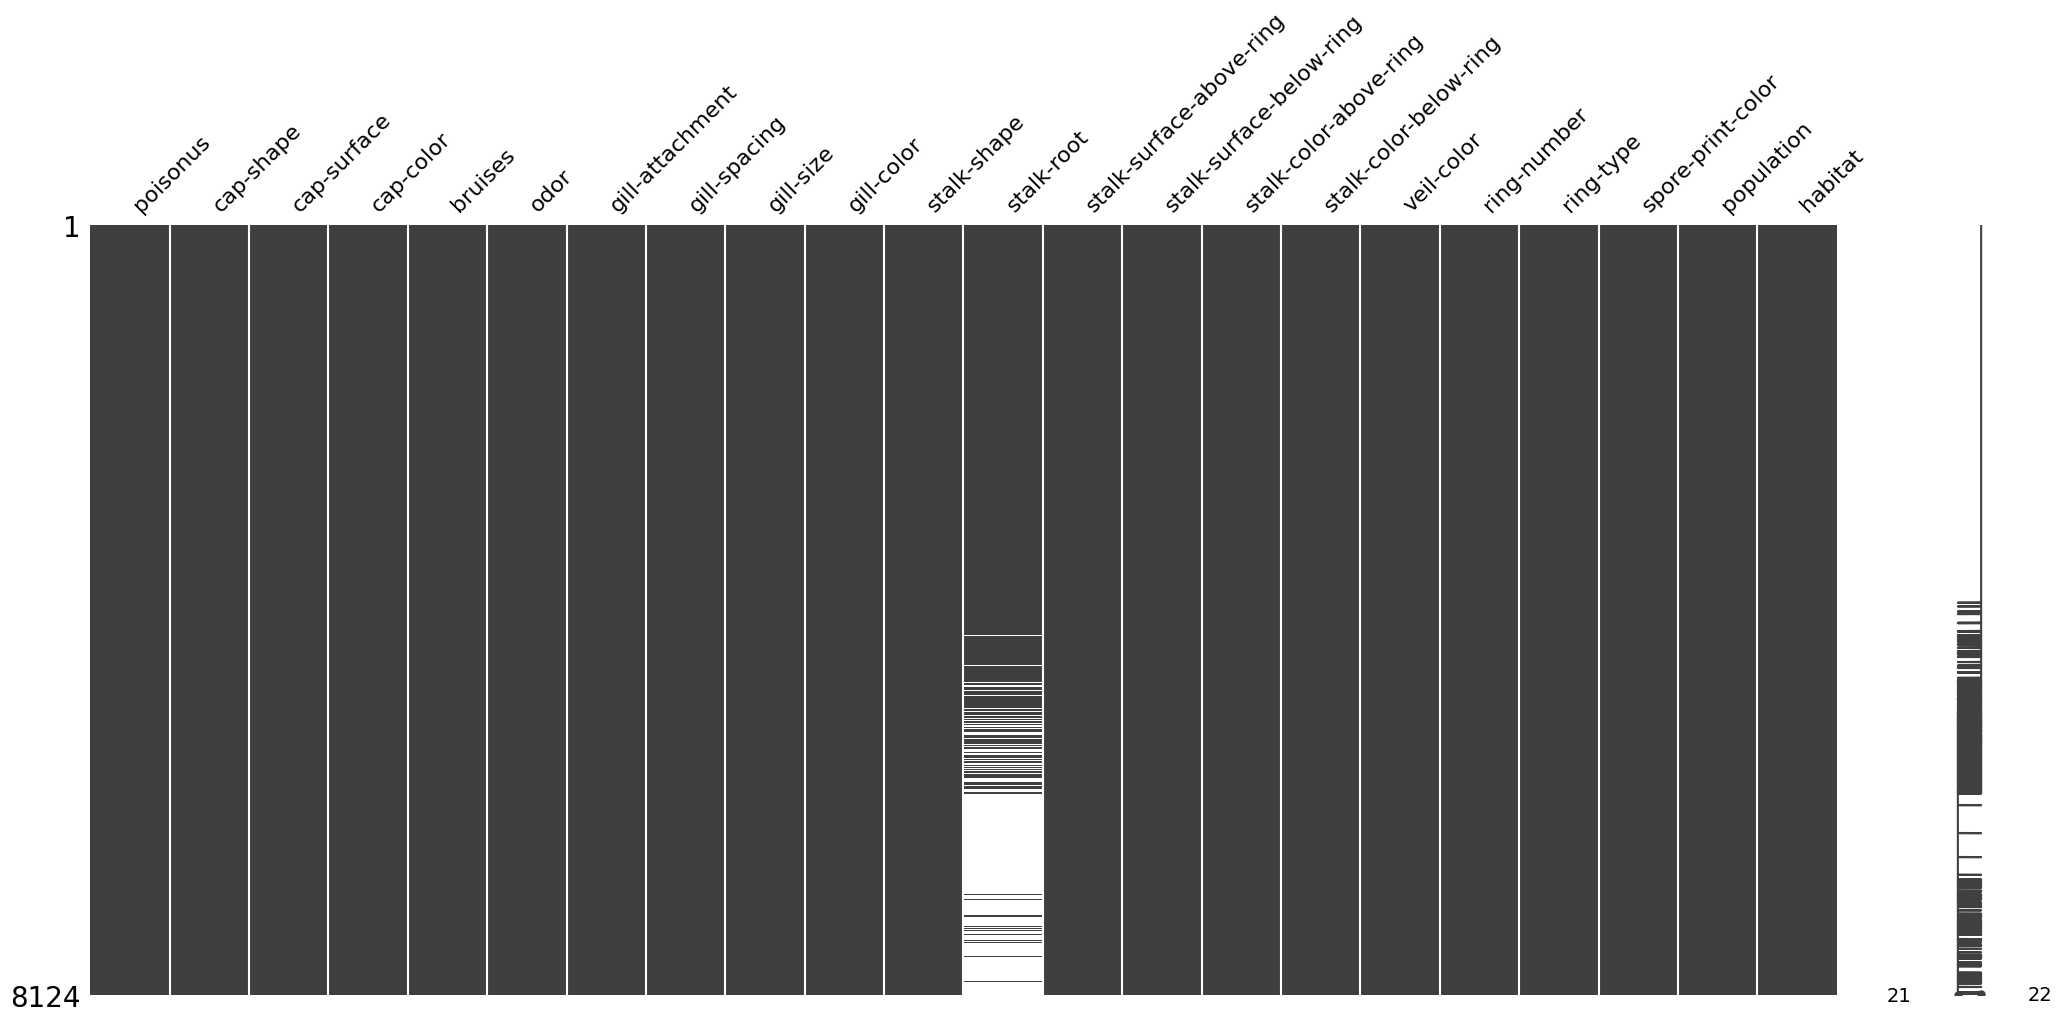

In [9]:
#Distribución de valores nulos
msno.matrix(df)

<Axes: >

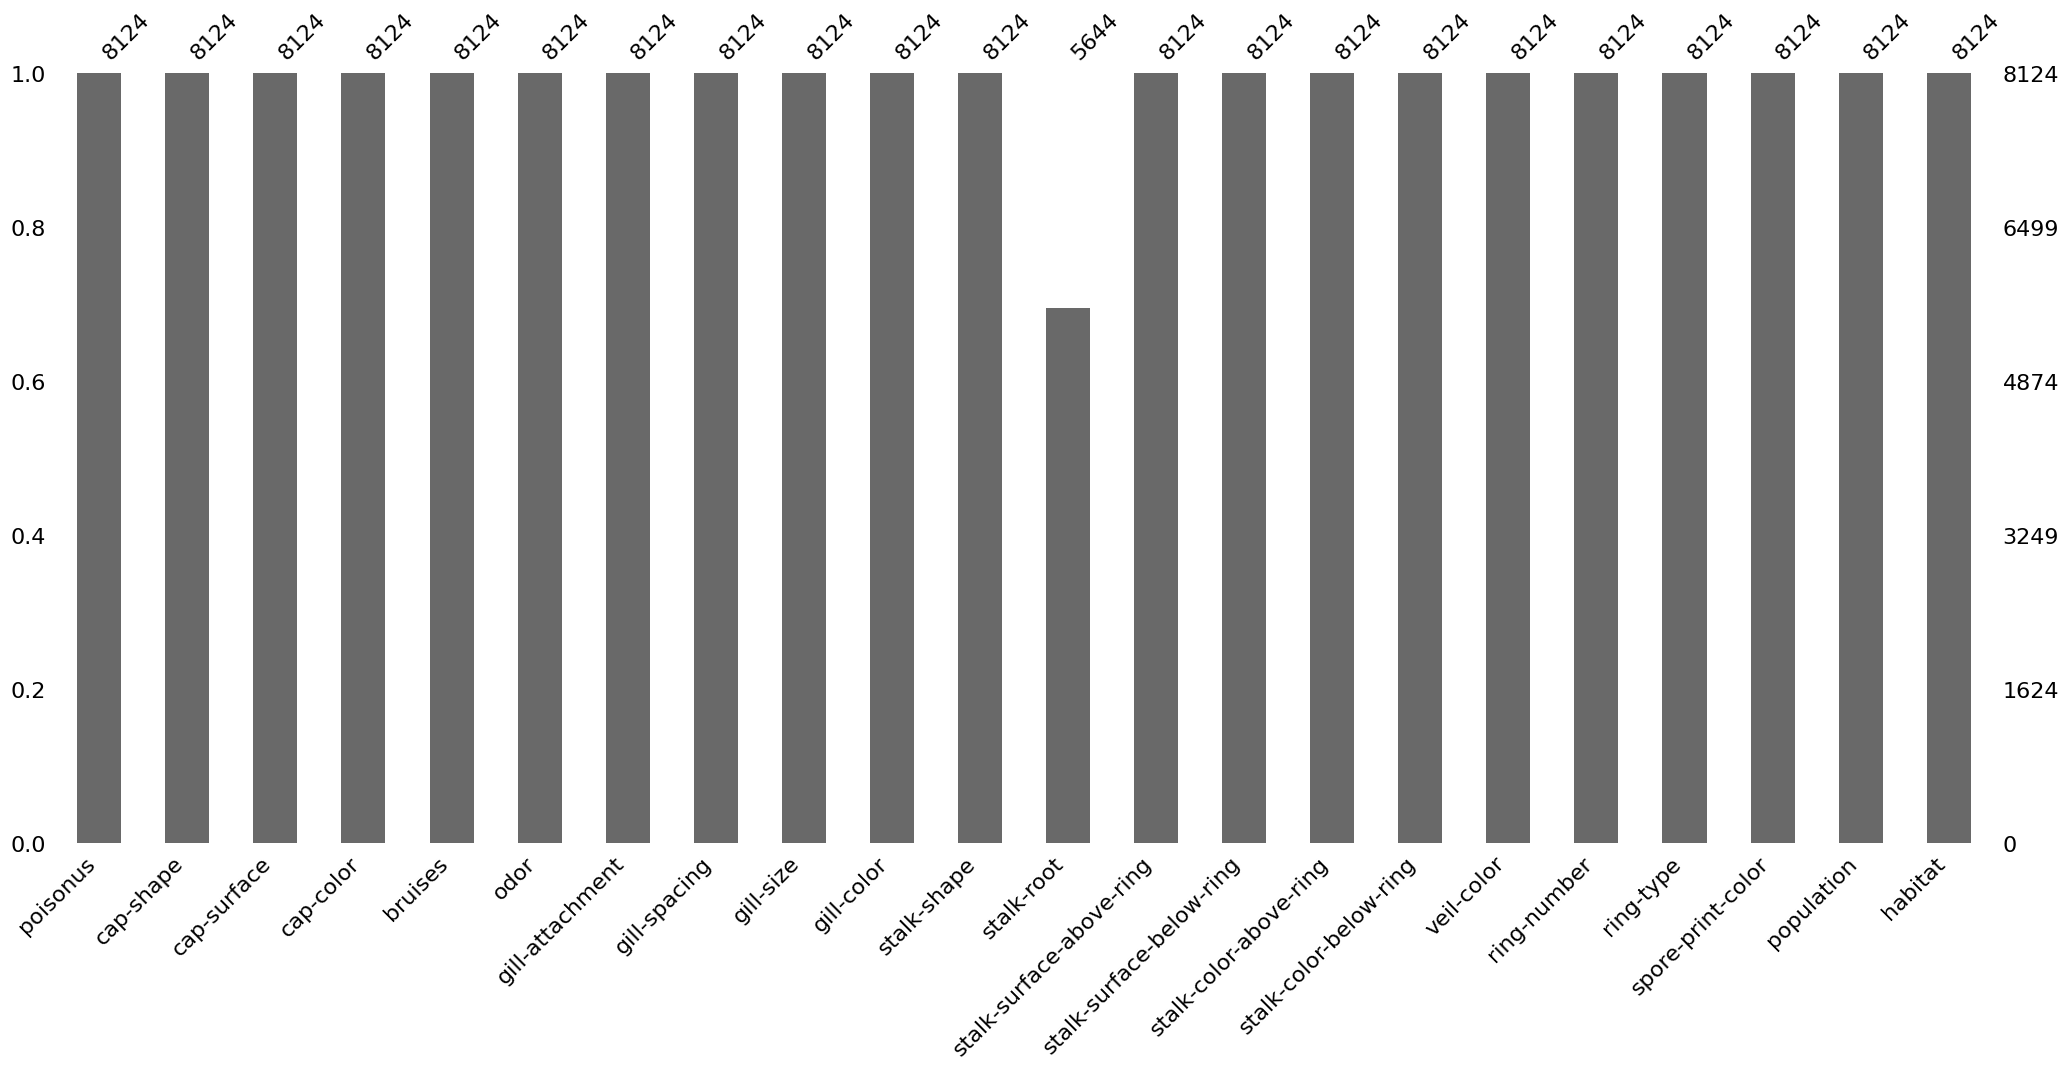

In [10]:
#Mostramos valores núlos
msno.bar(df)

In [11]:
df.isnull().sum().sort_values(ascending=False)

stalk-root                  2480
poisonus                       0
cap-surface                    0
cap-color                      0
bruises                        0
cap-shape                      0
odor                           0
gill-attachment                0
gill-size                      0
gill-spacing                   0
gill-color                     0
stalk-shape                    0
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [12]:
#Vemos que valores tiene la columna stalk-root
cantidad_valores = df['stalk-root'].value_counts()
cantidad_valores

stalk-root
bulbous    3776
equal      1120
club        556
rooted      192
Name: count, dtype: int64

In [13]:
#Imputamos valores en nulos por el mas frecuente evitando introducir sesgo o distorsión en el dataset
df['stalk-root'] = df['stalk-root'].fillna(df['stalk-root'].mode()[0])
cantidad_valores = df['stalk-root'].value_counts()
cantidad_valores

stalk-root
bulbous    6256
equal      1120
club        556
rooted      192
Name: count, dtype: int64

In [14]:
df.isnull().sum().sort_values(ascending=False)

poisonus                    0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [15]:
df.to_csv('../data/clean/agaricus-lepiota.csv',index=False)
df.to_parquet('../data/clean/agaricus-lepiota.parquet',engine='pyarrow',index=False)